# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [5]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

* Smartcab isn't moving. 
* Gets punished in idle state when the light is green and no incoming traffic. It's undervalued.
* Gets rewarded in waiting state when the light is red indicating safe spot. 
* Reward function isn't complete as of yet.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**


- Environment flags:
'num_dummies' shows number of verhicles inside the grid.'grid_size' shows its dimensions.


- Driving Agent flags:
'Learning' checks agent's improvement on policy based on Q-Learning, where epsilon is the exploration factor and alpha is the learning rate. It faces a trade-off between learning more about its environment and invading what it already knows. Higher epsilon indicates better exploration rate. Alpha and learning rate show rate of algorithm convergence.


- Action function is called 'act'.


- render_text() prints text (additional info) on terminal, render() prints text in the GUI. 


- next_waypoint() function checks if smartcab is in the destination or its direction -- east or west of the smartcab's destination, then north or south of the smartcab's destination. The final destination is based on how close it is to the destination and is left with three options -- left, right or forward.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


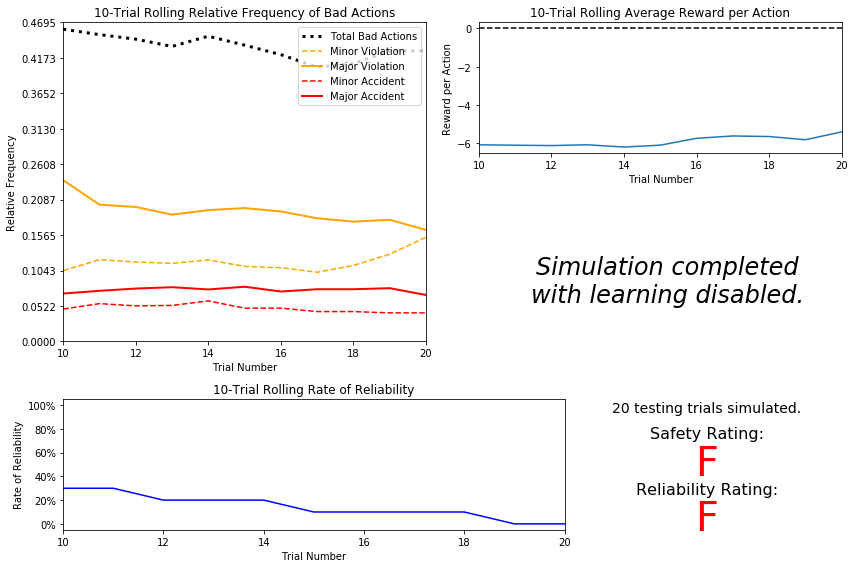

In [6]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

* Random Acts account to 40% (Approx) bad actions. 


* 4.5% (Approx) are major accidents.


* 22% (Approx) are major violations. 


* The average reward is at about -4, indication of charging large penalties without any reliability.


* Low reliability rating is calculated as average net reward on recent trials —- random acts cause low ratings. 


* The results vary over time, with probabilities executed randomly.


* As we already know, it’s act is based on random chances. It’s not reliable. It’s not safe. 


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

Important features:

* 'waypoint': This feature is relevant to efficiency since it tells the Smartcab whether it is driving towards destination or not. As we can see in the GUI simulation, a warning is depicted when the Smartcab doesn't follow the waypoint.
* 'inputs["light"]': This feature is relevant to safety. In fact, it is a major feature for safety. A Smartcab should not go `forward` or `left` at a red light. If the light is green, it should take appropriate action based current state.
* 'inputs["oncoming"]': This feature is also relevant to safety. Consider an example in which the Smartcab has to turn `left`. It can only do so if the light is green and there is no `forward` or right `oncoming` traffic.
* inputs["left"]: This feature is necessary to check if an agent can perform a `right` turn at a red light or not.

Irrelevant features:
* 'inputs["right"]': Since the Smartcab cannot move `forward` or `left` at a red light, there is no need to check the direction of the traffic on `right`.
* 'deadline': Even though deadline may seem relevant feature for efficiency, it is not so in this case because there are no available actions that the Smartcab can take with respect to deadline. i.e. It cannot increase its speed as there is no speed limit in the environment and the agent takes a specific action at a constant interval. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

* State Space structure —- state = waypoint, inputs['light'], inputs['left'], inputs['oncoming']. 

* Total number of states = 3x2x2x4x4 = 96

| Feature name | Possible values |  No. of values |
|:---:|:--------:|:------:|
| waypoint | 'forward', 'left', 'right' | 3 |
| inputs['light'] | 'red', 'green' | 2 |
| inputs['oncoming'] |   'forward', 'left', 'right', None   | 4 |
| inputs['left'] |   'forward', 'left', 'right', None   | 4 |

* For a red traffic light, in approach to cab from right, there’s no need of inputs[‘right’]. However inputs[‘left’] is fine as it’s legal when there’s no incoming vehicles.

* No need of deadlines as there’s no difference between traffic rules and delay.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

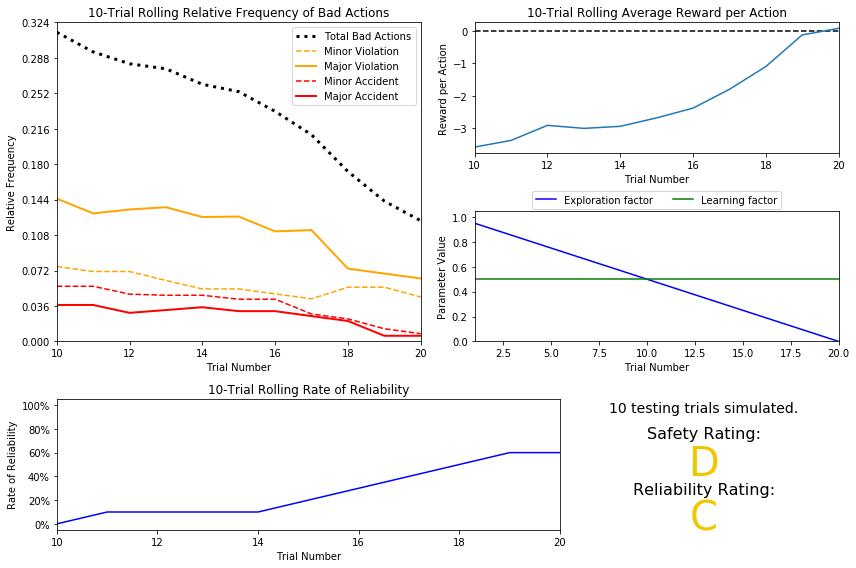

In [7]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- Agent has learnt successfully with a high grade. Unlike the basic driving agent, the number of infractions is decreasing over time, while reliability and reward per action are increasing. 


- The agent took many training trials, which makes sense given that epsilon=0.5 at trial # 1 and is then decreased by 0.05 in each trial, and that the tolerance (the threshold for epsilon when the algorithm switches to testing) is 0.05.


- Yes, the decaying function is accuractely represented. It decreases linearly from 0.5 at a rate of -.005.


- Yes, the number of training trials decreased and the rewards in increased continuously.


- At the end, the cab is safer and more reliable. I expect that both reliability and safety can be further improved by allowing the cab more training trials.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

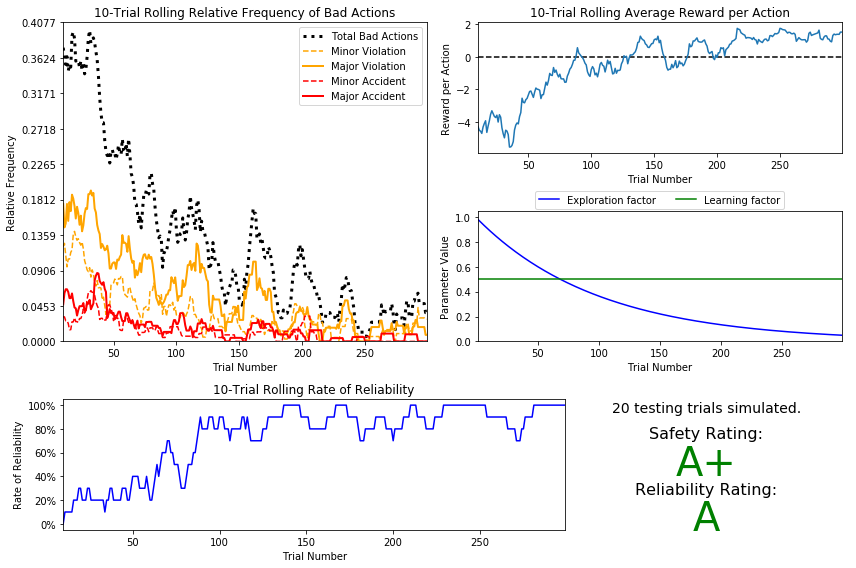

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- The decay function used is **e^(-0.01t)**.
- The agent trained for ~250 trials before testing begins.
- I used a learning rate of alpha=1, which is good for a deterministic environment, and an epsilon-tolerance of 0.05. For all I can tell, the learning rate is not that important given that the utility of future states is not used at all. We just keep on adding more credits or demerits at rate alpha to state-actions pairs depending on the reward of a  given state-action pair and, if we do this at the same rate for all states, the outcome should be roughly the same for any positive alpha.
- A great deal of improvement. With enough training, the smartcab has almost converged to perfect reliability and safety. This is apparent from a rolling reliability of 100 % and a continuously decreasing number of infractions. It seems that the car learns without getting stuck in local minima. Compared to the default parameters above, the car has greatly improved its safety and reliability, which is, in large part, due to the longer training phase. The training phase needs to be this long because of the considerable size of the state space and the number of actions available in each state. It takes a while until the car has explored all relevant combinations of states and actions, which is for times the size of the state space. From the visual simulation, it becomes apparent that, by the end, the car has learnt to either wait when moving in the right direction would be a traffic infraction, and to move in the right direction otherwise. What the car has not learnt, and couldn't learn for the reasons given below, is to choose alternative routes. 
- Yes. Indeed, it seems to be close to learning a perfect policy.
- Yes, though, before putting the cab to work it should get further training and get the rules exactly right. 



### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
    The table given below summarizes about optimal policies.

| Waypoint 	| Light 	| Left 	| Oncoming | Policy |
|:-----:	|:------:	|:-----------:	| :--------: | :---------:| :---------:|
|   Forward|  Green | x  | x | Forward|
|   Left   	|  Green | x  | Right, Forward| None|
|   Left   | Green | x  | Left, None | Left |
|   Right  	| Green | x |  x | Right |
|   Forward   	| Red | x  | x | None |
|   Left  |  Red | x | x  | None| 
|Right |Red| Forward  | x | None |
|Right|Red | Left, Right, None  | x | Right|

 We assume any time if light is green and we want to move forward, we can safely do that. We might even easily see why this is so by considering all the potential states in which we want to drive forward and the light is green.  
 
 If there are no cars either to our left or the oncoming lane, then there is no danger and we can drive forward. 
 
 If there is a car to our left, that car is seeing a red light and will not drive forward because it would be in violation of traffic rules.  If that car wants to turn right, it can do so without being in our way. On the other hand, if the car wants to turn left, it must again wait for a green light to avoid being in violation of traffic rules.  Therefore, there is no action that a car on our left can legally take to affect our decision of moving forward on a green light. 
 
 As for an oncoming vehicle, if the car wants to turn right it will not affect our path. If the vehicle wants to turn left, it might cause an accident if does turn left but according to the right-of-way rules we have precedence, so therefore we can drive forward regardless of the presence of an oncoming vehicle intending to turn left.  Lastly, if the oncoming vehicle is intending to drive forward, it will again not affect our path.  Therefore, the presence itself of an oncoming vehicle does not affect our decision to move forward on a green light.
 
 Anytime the policy for a Waypoint, Light pair is independent of the presence of a vehicle, the cell is marked as x in the table above. 
 
 Using similar reasoning, to which I will not tediously subject the reader, policies independent of the presence of other vehicles may be derived for other Waypoint, Light pairs: (Right, Green), (Forward, Red), (Left, Red)
 
 This is indeed what our agent has learned except for one conspicuous example.  
 
 For the most part our agent has learned to stop at a red light if it intends to move forward or left. 
 
 ('forward', 'red', 'forward', 'left')  
 -- forward : -37.45  
 -- right : -15.45  
 -- None : 2.42  
 -- left : -30.26  

('forward', 'red', 'right', 'right')  
 -- forward : -4.62  
 -- right : -0.02  
 -- None : 0.99  
 -- left : -20.28  
 
('left', 'red', None, 'forward')  
 -- forward : -10.45  
 -- right : 1.14  
 -- None : 1.79  
 -- left : -10.16  
 
('left', 'red', None, 'left')  
 -- forward : -10.38  
 -- right : 0.95  
 -- None : 1.64  
 -- left : -10.04  

  However, there is an example of a state where our agent did not learn the optimal strategy:
  
 ('forward', 'red', 'right', 'forward')  
 -- forward : -20.12  
 -- right : 0.46  
 -- None : 0.00  
 -- left : -7.15  

In this case, the q value for the 'None' action is 0, while the action 'right' is slightly larger at 0.46. Since all actions start with a q value of 0, it may be inferred that our agent did not have the opportunity to "try" waiting at the light and so never learned that in this particular state the optimal policy would actually be to wait at the light and move forward.  By turning right the agent would not incur the heavy penalty of an infraction or an accident, but it would simply waste the opportunity to make more progress toward the goal.  For this reason, our agent would have to be given more opportunities to encounter this state and randomly "try" waiting in order to calculate the optimal policy. This is an example of the local minima one may get stuck in if exploration, quantified by epsilon here, is not used in value iteration.

Another similar examples:

('right', 'green', 'right', 'forward')  
 -- forward : 0.67  
 -- right : 0.00  
 -- None : 0.00  
 -- left : 0.00  
 
 The most interesting cases are those of (Left, Green) and (Right, Red).  
 
 If the light is green and we intend to turn left, then, when there is an oncoming vehicle turning right or moving forward, the truly optimal policy would be to wait--in this case represented by None.  However, in the implementation of rewards for this environment the designers decided to assume that the Smartcab would wait for these vehicles to turn before turning left. As such, the optimal policy, by measure of the rewards implemented in this environement, is to turn left even when there is an oncoming vehicle moving forward or itself turning left.  At this point it is clear that information about the oncoming vehicle is unnecessary for learning because of the peculiar way in which the rewards were implemented. 

Our agent's policy for any (Left, Green) waypoint-light pair is to turn left. In this case this represents the optimal policy.  

('left', 'green', 'left', 'forward')  
 -- forward : 0.37  
 -- right : 0.44  
 -- None : -2.86  
 -- left : 1.37  
 
('left', 'green', None, 'right')  
 -- forward : 0.75  
 -- right : 0.65  
 -- None : -3.51  
 -- left : 1.52  
 
 ('left', 'green', 'right', None)  
 -- forward : 0.42  
 -- right : 0.52  
 -- None : -2.86  
 -- left : 1.87  
 
('left', 'green', None, 'left')  
 -- forward : 0.86  
 -- right : 0.80  
 -- None : -4.67  
 -- left : 1.74  

Now the (Right, Red) waypoint-light pair. In this case, the reward implementation matches what one would expect to be the case in reality. If we intend to turn right on a red light, we do so unless there is a vehicle moving forward from our left.   

Our agent does the correct case in both instances.  When a car on our left is moving forward, it waits. 

('right', 'red', 'forward', 'forward')  
 -- forward : -37.53  
 -- right : -15.05  
 -- None : 0.64  
 -- left : -20.10  
 
('right', 'red', 'forward', 'left')  
 -- forward : -20.21  
 -- right : -10.  
 -- None : 0.72  
 -- left : -30.30  

Otherwise, it takes the right turn. 


('right', 'red', 'left', 'left')  
 -- forward : -5.12  
 -- right : 2.25  
 -- None : 0.00  
 -- left : -9.00  
 
('right', 'red', 'right', 'right')   
 -- forward : 0.00  
 -- right : 1.56  
 -- None : 0.00  
 -- left : -20.44  



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Since there is no extra reward for reaching the goal or for reaching the goal quickly, we cannot reward the smartcab for doing something that's costly in the short run and pays off in the long run, such as violating traffic to get to the goal faster. Of course, this is for a good reason, because we're not willing to trade off safety for reliability.

The reason having to do with the cab itself is that the cab does not know how present actions affect future possibilities. For example, a car would have no sense that running a red light now will allow it to dodge traffic at the next intersection or to catch a couple of green lights. If the car could perceive, say, the lights at the next intersection, this would change. In this sense, the smartcab is more limited than human drivers, and looking ahead becomes impossible. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.